# ANIMAL OBJECT DETECTION USING YOLOv8

**1. LOADING THE DATA**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing libraries
import os
import pandas as pd
import numpy as np
import xml.etree.ElementTree as et
from glob import glob
import cv2
import yaml
import matplotlib.pyplot as plt
from yaml.loader import SafeLoader

In [3]:
# defining the path
BASE_PATH = '/content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection'
TRAIN_PATH = os.path.join(BASE_PATH, 'dataset', 'train')
TEST_PATH = os.path.join(BASE_PATH, 'dataset', 'test')
YAML_PATH = os.path.join(BASE_PATH, 'data.yaml')

**2. Extracting object information from XML file**

In [4]:
def extract_object_info(filename):
    tree = et.parse(filename)
    root = tree.getroot()

    # Initialize a new list for each file
    xml_data = []

    # 1. Extracting Image title
    image_title = root.find('filename').text

    # 2. Extracting Image size
    width, height = int(root.find('size').find('width').text), int(root.find('size').find('height').text)

    # 3. Extracting Bounding Box Parameters
    objects = root.findall('object')
    for o in objects:
        name = o.find('name').text
        xmin = int(o.find('bndbox').find('xmin').text)
        xmax = int(o.find('bndbox').find('xmax').text)
        ymin = int(o.find('bndbox').find('ymin').text)
        ymax = int(o.find('bndbox').find('ymax').text)
        xml_data.append([image_title, width, height, name, xmin, xmax, ymin, ymax])

    return xml_data

In [5]:
#loading XML files from training and testing set
train_xml_list = glob(os.path.join(TRAIN_PATH, '*.xml'))
test_xml_list = glob(os.path.join(TEST_PATH, '*.xml'))

In [6]:
train_xml_list[:3]

['/content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/train/Abyssinian_176_jpg.rf.ea0d5f38014e4a2850a5e4efa3a252af.xml',
 '/content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/train/chihuahua_102_jpg.rf.f187abdfdf99bad2b1f23c04815e78b7.xml',
 '/content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/train/keeshond_16_jpg.rf.5fd358c31b9762049b3a06c1c4978e7b.xml',
 '/content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/train/saint_bernard_154_jpg.rf.6849d2605f65286a18748f9412f438c0.xml',
 '/content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/train/samoyed_143_jpg.rf.13e4ae109a7b9311383ba5b14dadd013.xml']

In [7]:
test_xml_list[:3]

['/content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/test/Russian_Blue_106_jpg.rf.1c97244302265b197afff1c007f5b51a.xml',
 '/content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/test/Egyptian_Mau_107_jpg.rf.2388d867e8fcaea493dd245e99923619.xml',
 '/content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/test/english_cocker_spaniel_173_jpg.rf.6ea2612a9f661b325d8336581342ef39.xml']

In [8]:
#prcessing the data with the help of function
train_data = []
test_data = []

for train_list in map(extract_object_info, train_xml_list):
    train_data.extend(train_list)

for test_list in map(extract_object_info, test_xml_list):
    test_data.extend(test_list)


In [9]:
#displaying parse data
train_data[:3]

[['Abyssinian_176_jpg.rf.ea0d5f38014e4a2850a5e4efa3a252af.jpg',
  400,
  467,
  'cat',
  65,
  243,
  16,
  175],
 ['chihuahua_102_jpg.rf.f187abdfdf99bad2b1f23c04815e78b7.jpg',
  333,
  500,
  'dog',
  19,
  238,
  28,
  277],
 ['keeshond_16_jpg.rf.5fd358c31b9762049b3a06c1c4978e7b.jpg',
  500,
  375,
  'dog',
  239,
  290,
  92,
  162]]

In [10]:
test_data[:3]

[['Russian_Blue_106_jpg.rf.1c97244302265b197afff1c007f5b51a.jpg',
  325,
  500,
  'cat',
  45,
  181,
  24,
  171],
 ['Egyptian_Mau_107_jpg.rf.2388d867e8fcaea493dd245e99923619.jpg',
  250,
  357,
  'cat',
  133,
  228,
  1,
  91],
 ['english_cocker_spaniel_173_jpg.rf.6ea2612a9f661b325d8336581342ef39.jpg',
  500,
  375,
  'dog',
  57,
  223,
  70,
  225]]

In [11]:
#converting this data to dataframe format
train_df = pd.DataFrame(train_data, columns = ['filename', 'width', 'height', 'name', 'xmin', 'xmax', 'ymin', 'ymax'])
test_df = pd.DataFrame(test_data, columns = ['filename', 'width', 'height', 'name', 'xmin', 'xmax', 'ymin', 'ymax'])

**Visualizing Training DataFrame**

In [12]:
train_df.shape

(2599, 8)

In [13]:
train_df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax
0,Abyssinian_176_jpg.rf.ea0d5f38014e4a2850a5e4ef...,400,467,cat,65,243,16,175
1,chihuahua_102_jpg.rf.f187abdfdf99bad2b1f23c048...,333,500,dog,19,238,28,277
2,keeshond_16_jpg.rf.5fd358c31b9762049b3a06c1c49...,500,375,dog,239,290,92,162
3,saint_bernard_154_jpg.rf.6849d2605f65286a18748...,284,500,dog,156,236,295,364
4,samoyed_143_jpg.rf.13e4ae109a7b9311383ba5b14da...,500,333,dog,173,250,37,121


In [14]:
train_df['name'].unique()

array(['cat', 'dog'], dtype=object)

In [15]:
len(train_df['filename'].unique())

2523

In [24]:
train_df['name'].value_counts()

,count
name,
dog,1780
cat,819


**Visualizing Testing DataFrame**

In [16]:
test_df.shape

(400, 8)

In [20]:
test_df.head()

,filename,width,height,name,xmin,xmax,ymin,ymax
0,Russian_Blue_106_jpg.rf.1c97244302265b197afff1...,325,500,cat,45,181,24,171
1,Egyptian_Mau_107_jpg.rf.2388d867e8fcaea493dd24...,250,357,cat,133,228,1,91
2,english_cocker_spaniel_173_jpg.rf.6ea2612a9f66...,500,375,dog,57,223,70,225
3,english_setter_172_jpg.rf.f05f646888d796d88bc1...,500,375,dog,172,276,58,166
4,havanese_188_jpg.rf.40bfcc6b11087118cbe10271bc...,500,478,dog,65,256,37,193


In [22]:
test_df['name'].unique()

array(['cat', 'dog'], dtype=object)

In [23]:
len(test_df['filename'].unique())

358

In [25]:
test_df['name'].value_counts()

,count
name,
dog,265
cat,135


**3. Calcluating Normalized Coordinates and Dimensions for Bounding Boxes and Label Encoding**

In [28]:
print(f'Train Categories : {train_df["name"].unique()}\nTest Categories : {test_df["name"].unique()}')

Train Categories : ['cat' 'dog']
Test Categories : ['cat' 'dog']


In [29]:
for df in [train_df, test_df]:
  df['center_x'] = ((df['xmin'] + df['xmax'])/2)/df['width']
  df['center_y'] = ((df['ymin'] + df['ymax'])/2)/df['height']
  df['w'] = (df['xmax'] - df['xmin'])/df['width']
  df['h'] = (df['ymax'] - df['ymin'])/df['height']
  #adding numeric labels
  labels = {'cat' : 0, 'dog' : 1}
  df['id'] = df['name'].map(labels)

In [30]:
train_df.head(3)

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h,id
0,Abyssinian_176_jpg.rf.ea0d5f38014e4a2850a5e4ef...,400,467,cat,65,243,16,175,0.385000,0.204497,0.445000,0.340471,0
1,chihuahua_102_jpg.rf.f187abdfdf99bad2b1f23c048...,333,500,dog,19,238,28,277,0.385886,0.305000,0.657658,0.498000,1
2,keeshond_16_jpg.rf.5fd358c31b9762049b3a06c1c49...,500,375,dog,239,290,92,162,0.529000,0.338667,0.102000,0.186667,1


In [31]:
test_df.head(3)

,filename,width,height,name,xmin,xmax,ymin,ymax,center_x,center_y,w,h,id
0,Russian_Blue_106_jpg.rf.1c97244302265b197afff1...,325,500,cat,45,181,24,171,0.347692,0.195000,0.418462,0.294000,0
1,Egyptian_Mau_107_jpg.rf.2388d867e8fcaea493dd24...,250,357,cat,133,228,1,91,0.722000,0.128852,0.380000,0.252101,0
2,english_cocker_spaniel_173_jpg.rf.6ea2612a9f66...,500,375,dog,57,223,70,225,0.280000,0.393333,0.332000,0.413333,1


**4. Creating Text Files**

Text files are required for object detection using YOLO (You Only Look Once) because they store the bounding box annotations in a specific format that the YOLO model expects during training and inference.

In [32]:
def save_labels(df, folder_path):
  for filename, group in df.groupby('filename'):
    txt_filename = os.path.join(folder_path, os.path.splitext(filename)[0] + '.txt')
    group[['id', 'center_x', 'center_y', 'w', 'h']].to_csv(txt_filename, sep = ' ', index = False, header = False)

save_labels(train_df, TRAIN_PATH)
save_labels(test_df, TEST_PATH)

**5. Creating YAML File**

**data.yaml**

train: /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/train<br>
val: /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/test<br>
nc: 2<br>
names: ['cat', 'dog']

**6. Training YOLO Model**

In [ ]:
!pip install ultralytics

In [17]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection')

In [7]:
from ultralytics import YOLO

#loading the yolov8 model
model = YOLO('yolov8s.yaml')

#train the model
model.train(data = 'data.yaml', epochs = 20, batch = 8, name = 'Model')

Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=Model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

100%|██████████| 6.25M/6.25M [00:00<00:00, 88.2MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/train.cache... 2523 images, 90 backgrounds, 0 corrupt: 100%|██████████| 2613/2613 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/train/Abyssinian_112_jpg.rf.769a3690becfa9d6c61ca6e4fb31b99c.jpg: 3 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/train/Abyssinian_121_jpg.rf.c596a327944ec2656c5b8d8ef88d957b.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/train/Abyssinian_14_jpg.rf.c6e6a43ec14666d8ab8bf5d1423366b2.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/train/Abyssinian_176_jpg.rf.ea0d5f38014e4a2850a5e4efa3a252af.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/train/Bengal_102_jpg.rf.c1cd7ba184d72633826eb5bda48a6d9a.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/train/

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/test.cache... 358 images, 38 backgrounds, 0 corrupt: 100%|██████████| 396/396 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/test/Abyssinian_15_jpg.rf.0e12ac0df99238e4f77a9eb02877b769.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/test/Bengal_165_jpg.rf.7bb0ffb17bd876c913225f2cea00ee78.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/test/Birman_122_jpg.rf.4d7149e496c0fd1f50eaefde7da46b16.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/test/British_Shorthair_158_jpg.rf.cd75c50714fce78475221bb064720ae8.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/test/Siamese_145_jpg.rf.4599a021adfebfa346773143165a32a5.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/dataset/test/Siamese_148_jpg.rf

Plotting labels to runs/detect/Model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/Model
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.44G      2.743       3.95      3.722         10        640: 100%|██████████| 327/327 [07:30<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:10<00:00,  2.48it/s]

                   all        396        358      0.135     0.0356     0.0365    0.00955



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.37G      2.307       3.04       2.93         11        640: 100%|██████████| 327/327 [01:14<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.89it/s]

                   all        396        358      0.304      0.217      0.208     0.0837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       2.4G      2.061      2.634      2.663          9        640: 100%|██████████| 327/327 [01:14<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.21it/s]

                   all        396        358      0.264       0.45      0.232      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.37G      1.853      2.347      2.467          8        640: 100%|██████████| 327/327 [01:14<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.84it/s]

                   all        396        358      0.384       0.46      0.329      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.39G      1.723      2.155      2.301          9        640: 100%|██████████| 327/327 [01:15<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.42it/s]


                   all        396        358       0.51      0.642      0.531      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.36G      1.619      1.949      2.209         15        640: 100%|██████████| 327/327 [01:15<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.02it/s]

                   all        396        358      0.622      0.584      0.582       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.38G        1.5      1.817      2.094         12        640: 100%|██████████| 327/327 [01:14<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.93it/s]

                   all        396        358      0.628      0.683      0.653      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.39G      1.474      1.726      2.067         11        640: 100%|██████████| 327/327 [01:15<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.07it/s]

                   all        396        358      0.595      0.711      0.688      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.39G       1.39      1.614      1.965          9        640: 100%|██████████| 327/327 [01:13<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.75it/s]

                   all        396        358      0.688      0.753       0.73      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.39G      1.342      1.532      1.902          9        640: 100%|██████████| 327/327 [01:14<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.60it/s]

                   all        396        358       0.69      0.765      0.761      0.549


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.38G       1.16      1.186      1.783          5        640: 100%|██████████| 327/327 [01:13<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.80it/s]

                   all        396        358      0.713      0.804      0.802      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.37G      1.115       1.09      1.729          4        640: 100%|██████████| 327/327 [01:12<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.60it/s]

                   all        396        358       0.72      0.835      0.815      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.39G      1.055      1.012       1.66          4        640: 100%|██████████| 327/327 [01:13<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.92it/s]

                   all        396        358      0.779      0.817       0.83      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.36G      1.006     0.9347      1.619          6        640: 100%|██████████| 327/327 [01:12<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.95it/s]

                   all        396        358      0.799      0.842      0.846       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.38G     0.9706     0.8739      1.571          5        640: 100%|██████████| 327/327 [01:12<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.63it/s]

                   all        396        358      0.831      0.826      0.853      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.39G     0.9281     0.8248      1.527          5        640: 100%|██████████| 327/327 [01:12<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.93it/s]

                   all        396        358      0.834      0.853      0.863      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.38G     0.9079     0.7977      1.499          5        640: 100%|██████████| 327/327 [01:11<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  6.04it/s]

                   all        396        358      0.823      0.877      0.868      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.38G     0.8716     0.7416      1.461          5        640: 100%|██████████| 327/327 [01:12<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.57it/s]

                   all        396        358      0.792      0.904      0.872      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.39G     0.8358     0.7099      1.424          6        640: 100%|██████████| 327/327 [01:13<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.84it/s]

                   all        396        358       0.84      0.881      0.877      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.37G     0.8145     0.6866      1.406          5        640: 100%|██████████| 327/327 [01:12<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.94it/s]

                   all        396        358       0.86      0.885      0.884      0.718



20 epochs completed in 0.552 hours.
Optimizer stripped from runs/detect/Model/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/Model/weights/best.pt, 22.5MB

Validating runs/detect/Model/weights/best.pt...
Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.20it/s]


                   all        396        358      0.859      0.885      0.883      0.718
                   cat        122        122      0.839      0.893      0.874       0.76
                   dog        236        236      0.879      0.877      0.893      0.676
Speed: 0.3ms preprocess, 5.0ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/Model


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x784b5a990f70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [8]:
# exporting the model weights to onnx format
model.export(format = 'onnx')

Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'runs/detect/Model/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (21.5 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 217.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.8s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success ✅ 9.3s, saved as 'runs/detect/Model/weights/best.onnx' (42.6 MB)

Export complete (12.1s)
Results saved to /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/runs/detect/Model/weights
Predict:         yolo predict task=detect model=runs/detect/Model/weights/best.onnx imgsz=6

'runs/detect/Model/weights/best.onnx'

**7. Checking model inference on random image**

In [5]:
#loading the best weights
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/runs/detect/Model/weights/best.pt')

In [57]:
# Predict and visualize on a sample image
IMG_PATH = '/content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/cat_dog.png'
# IMG_PATH = '/content/cat.jpg'
image = cv2.imread(IMG_PATH)
results = model.predict(source = IMG_PATH)


image 1/1 /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/cat_dog.png: 544x640 1 cat, 1 dog, 837.9ms
Speed: 5.5ms preprocess, 837.9ms inference, 1.9ms postprocess per image at shape (1, 3, 544, 640)


In [58]:
# Function to draw bounding box with label
def draw_bounding_box_with_label(image, label, bbox, color=(255, 0, 0), font=cv2.FONT_HERSHEY_SIMPLEX):
    xmin, ymin, xmax, ymax = bbox
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, 2)

    # Define font parameters
    font_scale = 0.8  # Adjust the font scale as necessary
    font_thickness = 1  # Adjust thickness for better readability
    text_size, _ = cv2.getTextSize(label, font, font_scale, font_thickness)

    # Position the text within the bounding box
    text_x = xmin
    text_y = max(ymin - 5, text_size[1] + 5)  # Adjust text position

    # Draw text background for better visibility
    cv2.rectangle(image, (text_x, text_y - text_size[1] - 5),
                  (text_x + text_size[0], text_y + 5), color, -1)

    # Draw the text with anti-aliasing
    cv2.putText(image, label, (text_x, text_y), font, font_scale,
                (0, 0, 0), font_thickness, lineType=cv2.LINE_AA)

In [59]:
# Loop through the predictions and draw bounding boxes and labels
for result in results:
    for box in result.boxes:
        xmin, ymin, xmax, ymax = map(int, box.xyxy[0])  # Bounding box coordinates
        label = result.names[int(box.cls)]  # Object label (e.g., 'cat', 'dog')
        confidence = box.conf[0]  # Confidence score

        # Label with confidence score
        label_with_conf = f"{label} {confidence:.2f}"

        # Draw bounding box and label on the image
        draw_bounding_box_with_label(image, label_with_conf, (xmin, ymin, xmax, ymax), color=(255, 255, 102))


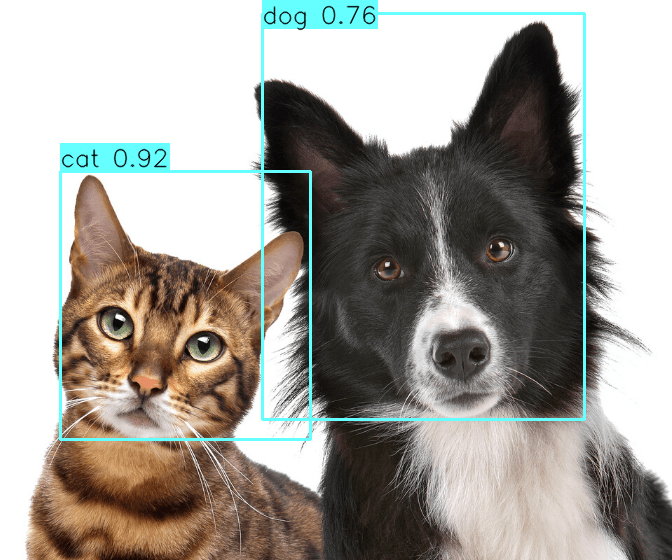

In [60]:
# Display the final image
from google.colab.patches import cv2_imshow

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

**8. Checking model inference on random Video**

In [36]:
ls

'Animal_Object Detection.ipynb'   cat_dog.png   dataset/   data.yaml   runs/   yolov8n.pt


In [37]:
!yolo detect predict model='runs/detect/Model/weights/best.pt' source="catDog.mp4"

Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/1112) /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/catDog.mp4: 384x640 1 dog, 648.6ms
video 1/1 (frame 2/1112) /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/catDog.mp4: 384x640 1 dog, 636.2ms
video 1/1 (frame 3/1112) /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/catDog.mp4: 384x640 1 dog, 645.6ms
video 1/1 (frame 4/1112) /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/catDog.mp4: 384x640 1 dog, 620.5ms
video 1/1 (frame 5/1112) /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/catDog.mp4: 384x640 1 dog, 412.6ms
video 1/1 (frame 6/1112) /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/catDog.mp4: 384x640 1 dog, 400.7ms
video 1/1 (frame 7/1112) /content/drive/MyDrive/Colab Notebooks/Animal_Object_Detection/catD

In [38]:
!ffmpeg -i {'runs/detect/predict/catDog.avi'} -vcodec libx264 {'pred.mp4'}

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab